In [16]:
from utils import *
plot_in_dark_mode()

In [74]:
path = './env_data/sampled_data*'
all_sampled_files = []

for file in glob.glob(path):
    all_sampled_files.append(load_bz2(file))
    
print(f"Found {len(all_sampled_files)} sampled files.")
print('Keys associated with each file: obs, params, costs/ reward')
print('The rewards or -costs associated refer to the raw values as seen by the ML agents and are not corrected for.')

Found 16 sampled files.
Keys associated with each file: obs, params, costs/ reward
The rewards or -costs associated refer to the raw values as seen by the ML agents and are not corrected for.


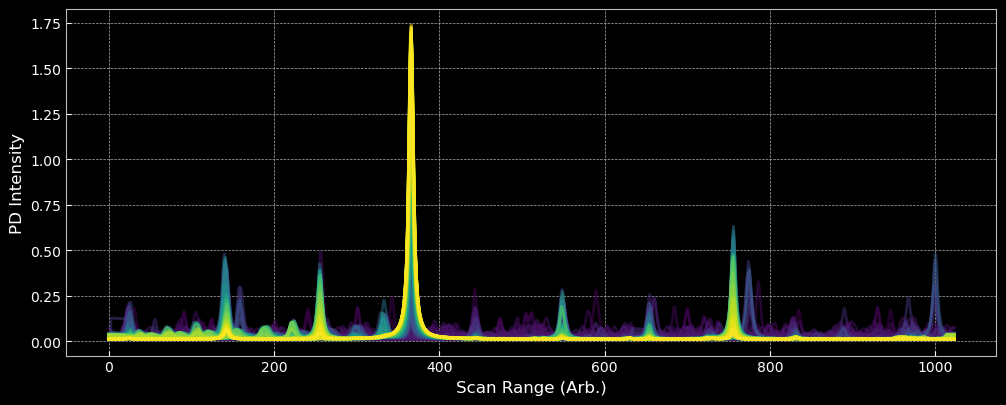

In [89]:
file_idx = random.randint(0, len(all_sampled_files) - 1)
rwd_key = 'costs' if 'costs' in all_sampled_files[file_idx] else 'reward'

if rwd_key == 'reward':
    rwd_arr = np.array(all_sampled_files[file_idx][rwd_key])
else:
    rwd_arr = -np.array(all_sampled_files[file_idx][rwd_key])
    
min_rwd = np.min(rwd_arr)
max_rwd = np.max(rwd_arr)

plt.figure(figsize=(12, 4.5))
cmap = plt.get_cmap('viridis')

norm = plt.Normalize(vmin=min_rwd, vmax=max_rwd)

# Correct traces to correct for thermal drift
alligned_obs = allign_traces(all_sampled_files[file_idx]['obs'])

# Sort traces based on reward, for better visualization
sorted_indices = np.argsort(rwd_arr)
sorted_obs = alligned_obs[sorted_indices]
sorted_rwd = rwd_arr[sorted_indices]

for i, o in enumerate(sorted_obs):
    rwd = sorted_rwd[i]
    plt.plot(o, color=cmap(norm(rwd)), alpha=0.5)
plt.xlabel('Scan Range (Arb.)')
plt.ylabel('PD Intensity')
plt.show()